# Import Data & Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn import preprocessing

from statistics import mean 
from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

- Pada data train terdapat 4250 jumlah data dengan 20 kolom
- Tidak terdapat data null pada data latih
- Variabel kualitatif: state, area code, international plan, voice mail plan

In [ ]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


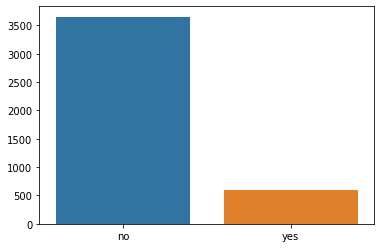

In [ ]:
# Cek jumlah data churn
y = df["churn"].value_counts()
sns.barplot(y.index, y.values)

Data tidak seimbang. Data tidak churn > data churn.

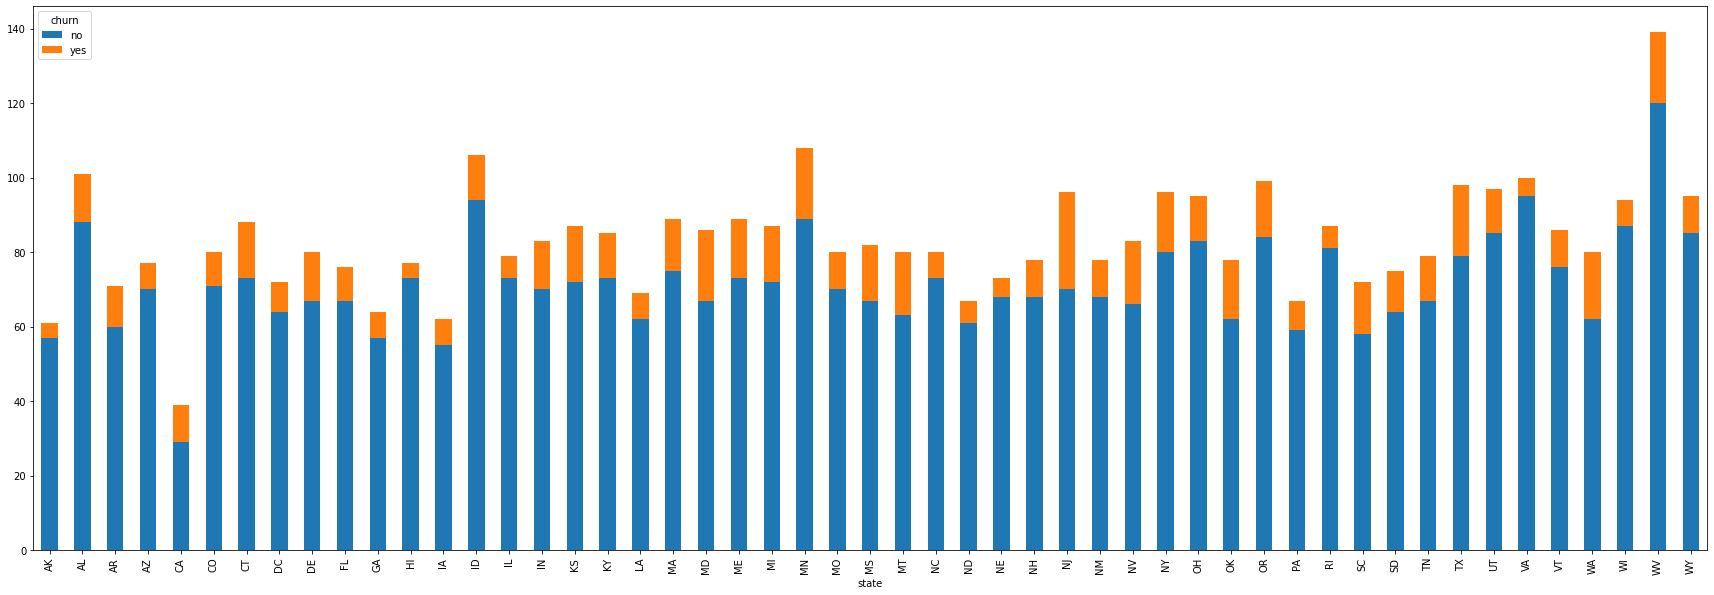

In [ ]:
# Churn berdasarkan state
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

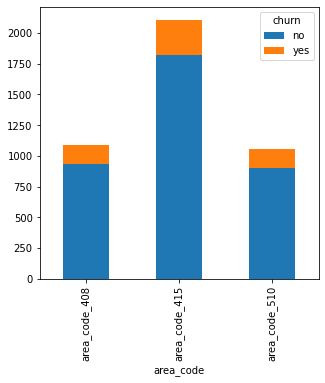

In [ ]:
# Churn berdasarkan area code
df.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

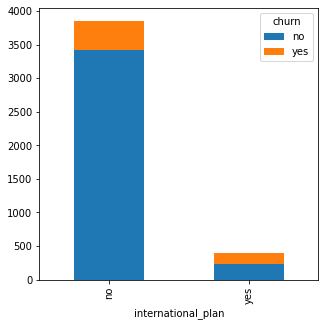

In [ ]:
# Churn berdasarkan international plan
df.groupby(["international_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

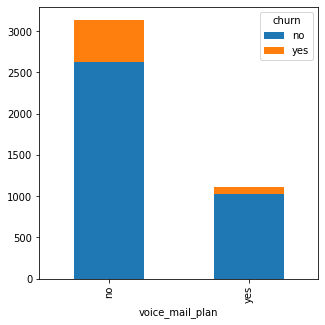

In [ ]:
# Churn berdasarkan voice mail plan
df.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

# Data Pre-processing

## Data Cleaning

### Missing Value

Berdasarkan df.info() pada section EDA, tidak terdapat missing value pada data train

### Resolve inconsistencies

In [ ]:
# Cek isi dari variabel kualitatif
print('state : ', df['state'].unique())
print('area_code : ', df['area_code'].unique())
print('international_plan : ', df['international_plan'].unique())
print('voice_mail_plan : ', df['voice_mail_plan'].unique())

state :  ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
area_code :  ['area_code_415' 'area_code_408' 'area_code_510']
international_plan :  ['no' 'yes']
voice_mail_plan :  ['yes' 'no']


Sudah konsisten

### Delete duplicate

In [ ]:
# cek data duplikat
df.duplicated().sum()

0

Tidak ada data duplikat

## Detect Outliers

In [ ]:
# cek kemiringan data
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


account_length                   0.122327
number_vmail_messages            1.373091
total_day_minutes               -0.006910
total_day_calls                 -0.085812
total_day_charge                -0.006913
total_eve_minutes               -0.030415
total_eve_calls                 -0.020812
total_eve_charge                -0.030388
total_night_minutes              0.008491
total_night_calls                0.005273
total_night_charge               0.008445
total_intl_minutes              -0.241360
total_intl_calls                 1.360122
total_intl_charge               -0.241671
number_customer_service_calls    1.082692
dtype: float64

In [ ]:
# Kolom numerik
num_cols = df.select_dtypes([np.number]).columns
num_cols

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}\n')

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    print("Jumlah outlier {}: {}".format(col, 4250-filtered_entries.sum()))
    
df2 = df[filtered_entries]

print(f'\nJumlah baris jika memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 4250

Jumlah outlier account_length: 20
Jumlah outlier number_vmail_messages: 106
Jumlah outlier total_day_minutes: 130
Jumlah outlier total_day_calls: 155
Jumlah outlier total_day_charge: 156
Jumlah outlier total_eve_minutes: 189
Jumlah outlier total_eve_calls: 212
Jumlah outlier total_eve_charge: 212
Jumlah outlier total_night_minutes: 249
Jumlah outlier total_night_calls: 279
Jumlah outlier total_night_charge: 279
Jumlah outlier total_intl_minutes: 339
Jumlah outlier total_intl_calls: 430
Jumlah outlier total_intl_charge: 430
Jumlah outlier number_customer_service_calls: 735

Jumlah baris jika memfilter outlier: 3515


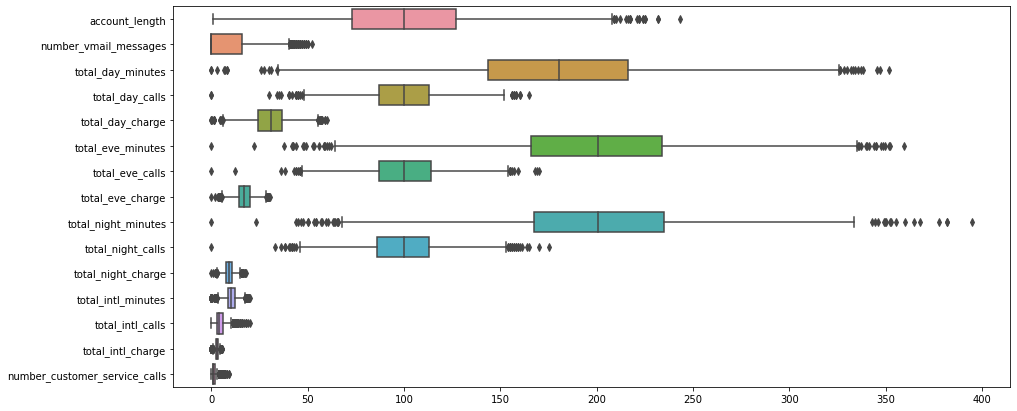

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, width=0.8, orient='h')

## Feature Selection

In [ ]:
y = df['churn']
df = df.drop('churn', axis=1)

### Kolom Numerik

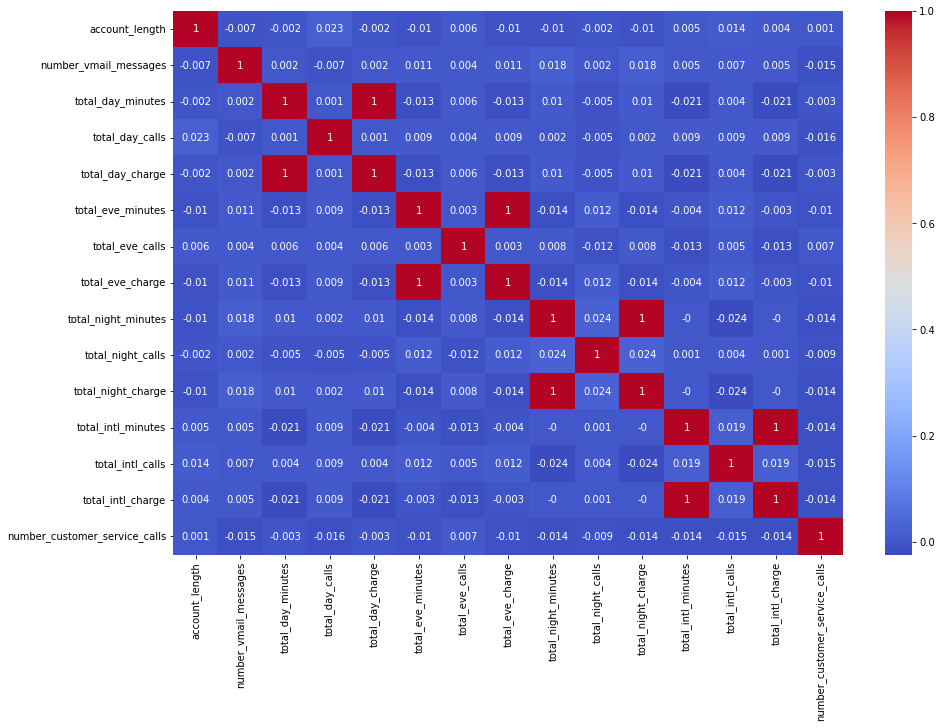

In [ ]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()

- total day/eve/night/intl charge dan total day/eve/night/intl minutes dapat dipilih salah satu karena nilai korelasi = 1

#### ANOVA f-test

In [ ]:
Xnum = df.select_dtypes([np.number])

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(Xnum, y)

SelectKBest(k='all')

In [ ]:
for i in range(len(fs.pvalues_)):
  # Dipilih kolom dengan pvalue < 0.05
  if fs.pvalues_[i] < 0.05:
	  print('%s: %f' % (num_cols[i], fs.pvalues_[i]))

number_vmail_messages: 0.000000
total_day_minutes: 0.000000
total_day_charge: 0.000000
total_eve_minutes: 0.000000
total_eve_charge: 0.000000
total_night_minutes: 0.002352
total_night_charge: 0.002355
total_intl_minutes: 0.000319
total_intl_calls: 0.025201
total_intl_charge: 0.000320
number_customer_service_calls: 0.000000


Kolom num yang akan digunakan : 
number_vmail_messages, total_day_minutes, total_eve_minutes, total_night_minutes, total_intl_minutes, total_intl_calls, number_customer_service_calls

### Kolom Kategori

#### Chi2 test

In [ ]:
Xcat = df.select_dtypes('object').columns
Xcat

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
for col in Xcat:
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(df[Xcat], y)
fit.scores_

array([1.83168237e+00, 2.46780160e-01, 2.58635794e+02, 4.12424847e+01])

In [ ]:
for i in range(len(fit.pvalues_)):
  if fit.pvalues_[i] < 0.05:
	  print('%s: %f' % (Xcat[i], fit.pvalues_[i]))

international_plan: 0.000000
voice_mail_plan: 0.000000


Kolom cat yang akan digunakan : 
international_plan, voice_mail_plan.

Karena voice mail plan berhubungan dengan number_vmail_messages (vmail_plan = yes berarti number_vmail > 0) sehingga hanya dipakai number_vmail_messages

In [ ]:
columns_fs = ['number_vmail_messages', 
              'total_day_minutes', 
              'total_eve_minutes', 
              'total_night_minutes', 
              'total_intl_minutes', 
              'total_intl_calls', 
              'number_customer_service_calls',
              'international_plan']

X = df[columns_fs]

In [ ]:
X.head(10)

,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls,international_plan
0,26,161.6,195.5,254.4,13.7,3,1,0
1,0,243.4,121.2,162.6,12.2,5,0,0
2,0,299.4,61.9,196.9,6.6,7,2,1
3,0,166.7,148.3,186.9,10.1,3,3,1
4,24,218.2,348.5,212.6,7.5,7,3,0
5,0,157.0,103.1,211.8,7.1,6,0,1
6,0,184.5,351.6,215.8,8.7,4,1,0
7,37,258.6,222.0,326.4,11.2,5,0,1
8,0,129.1,228.5,208.8,12.7,6,4,0
9,0,187.7,163.4,196.0,9.1,5,0,0


### Build Feature Matrix

In [ ]:
X = X.to_numpy().astype(np.float64)
X

array([[ 26. , 161.6, 195.5, ...,   3. ,   1. ,   0. ],
       [  0. , 243.4, 121.2, ...,   5. ,   0. ,   0. ],
       [  0. , 299.4,  61.9, ...,   7. ,   2. ,   1. ],
       ...,
       [  0. , 170.7, 193.1, ...,   7. ,   1. ,   0. ],
       [ 40. , 235.7, 223. , ...,   5. ,   2. ,   0. ],
       [ 34. , 129.4, 267.1, ...,  16. ,   0. ,   0. ]])

In [ ]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.36685697, -0.34550964, -0.09302489, ..., -0.57916393,
        -0.42634613, -0.32054702],
       [-0.56791143,  1.16913636, -1.57182002, ...,  0.2329267 ,
        -1.1889602 , -0.32054702],
       [-0.56791143,  2.20605783, -2.7520697 , ...,  1.04501732,
         0.33626795,  3.11966717],
       ...,
       [-0.56791143, -0.1770099 , -0.14079216, ...,  1.04501732,
        -0.42634613, -0.32054702],
       [ 2.40865534,  1.02655966,  0.45430844, ...,  0.2329267 ,
         0.33626795, -0.32054702],
       [ 1.96217032, -0.94173948,  1.33203206, ...,  4.69942514,
        -1.1889602 , -0.32054702]])

# Pemodelan Data

### Stratified Cross Validation

In [ ]:
def stratified_cv(X, y, clf_class, shuffle=True, n_splits=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=2)
    y_pred = y.copy()
    lst_f1_stratified = []
    result = {}    

    for train_index, test_index in stratified_k_fold.split(X,y): 
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        lst_f1_stratified.append(metrics.f1_score(y_test, y_pred, pos_label='yes'))
    
    result['max'] = max(lst_f1_stratified)
    result['min'] = min(lst_f1_stratified)
    result['mean'] = mean(lst_f1_stratified)   
    
    return result   

In [ ]:
print('F1-Score\n')
print('Gradient Boosting Classifier:\n {}\n'.format(stratified_cv(X, y, ensemble.GradientBoostingClassifier)))
print('Support vector machine(SVM):\n {}\n'.format(stratified_cv(X, y, svm.SVC)))
print('Random Forest Classifier:\n {}\n'.format(stratified_cv(X, y, ensemble.RandomForestClassifier)))
print('K Nearest Neighbor Classifier:\n {}\n'.format(stratified_cv(X, y, neighbors.KNeighborsClassifier)))
print('Logistic Regression:\n {}\n'.format(stratified_cv(X, y, linear_model.LogisticRegression)))

F1-Score

Gradient Boosting Classifier:
 {'max': 0.8869565217391303, 'min': 0.7216494845360825, 'mean': 0.8290709193565738}

Support vector machine(SVM):
 {'max': 0.8113207547169811, 'min': 0.6947368421052631, 'mean': 0.7505010188793833}

Random Forest Classifier:
 {'max': 0.9107142857142857, 'min': 0.7096774193548386, 'mean': 0.8305449802021899}

K Nearest Neighbor Classifier:
 {'max': 0.712871287128713, 'min': 0.5348837209302325, 'mean': 0.6372702418002192}

Logistic Regression:
 {'max': 0.35897435897435903, 'min': 0.2077922077922078, 'mean': 0.2989221960290813}



Jika dilihat dari hasil mean f1-score model terbaik adalah Gradient Boosting Classifier dengan mean f1-score = 83%, maka digunakan model tersebut untuk data testing.

# Klasifikasi Data Test

In [ ]:
X_test = df_test[columns_fs]
X_test['international_plan'] = label_encoder.fit_transform(X_test['international_plan'])

X_test = X_test.to_numpy().astype(np.float64)
X_test = scaler.fit_transform(X_test)
X_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[ 1.17223958,  1.59039051, -0.11233349, ..., -0.61370155,
        -0.49763904, -0.33825002],
       [-0.59901452,  0.80689199,  0.33253137, ...,  0.62582133,
        -1.28173416,  2.95639303],
       [-0.59901452, -1.12273146,  1.9931045 , ...,  0.62582133,
         1.85464633, -0.33825002],
       ...,
       [-0.59901452,  0.07036581,  1.02667395, ..., -1.02687584,
         1.07055121, -0.33825002],
       [-0.59901452, -0.74883169, -0.58404364, ..., -0.20052726,
        -0.49763904, -0.33825002],
       [-0.59901452,  0.1567949 , -0.60513637, ...,  0.62582133,
        -1.28173416, -0.33825002]])

In [ ]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(X, y)
y_test_pred = clf.predict(X_test)

In [ ]:
# Hasil

X_t = df_test
X_t['churn_pred'] = y_test_pred
X_t

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn_pred
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,yes
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,no
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,no
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,no
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,no
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no


In [ ]:
X_t.to_csv('hasil_test.csv')

In [ ]:
X_t['churn_pred'].value_counts()

no     655
yes     95
Name: churn_pred, dtype: int64